## Task 1 – Data Science Process Steps

(for Weather Condition Prediction using the Kaggle Weather Dataset)

1. **Ask Questions / Problem Definition**

Goal: Predict the weather condition (precipitation type or other weather events) from past weather data.

Key Question: Can we accurately classify weather conditions using features such as temperature, humidity, visibility, and wind speed?

2. **Data Collection**

Collect the dataset from Kaggle Weather Dataset
.

Upload to your Google Drive / Colab notebook.

Ensure it’s in a usable tabular format (CSV).

3. **Data Exploration / Understanding**

Use pandas to inspect the first few rows (head()), column names, and data types.

Calculate summary statistics (mean, median, mode).

Visualize distributions and correlations using matplotlib or seaborn.

**4. Data Preprocessing / Cleaning**

Handle missing values (impute or mark as “none”).

Detect wrong values or outliers and correct/remove them.

Convert categorical variables to numeric (LabelEncoder).

Drop irrelevant columns (e.g., text summaries).

Scale/normalize features for consistent model input.

5. **Feature Engineering**

Add new columns or transform existing ones (for example, “Feels Like” temperature, time-of-day flags).

Select the most relevant variables for prediction.

**6. Data Modeling**

Split into X (features) and y (target).

Use train_test_split to create 80% training and 20% testing sets.

Train different models: Random Forest, Gradient Boosting, XGBoost.

**7. Data Analysis & Model Evaluation**

Evaluate models using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

Compare performance between ensemble methods.

**8. Visualization & Presentation of Results**

Visualize model results (confusion matrix, ROC curves, feature importances).

Present insights in clear charts and tables.

**9. Reflection / Recommendations**

Discuss which model performed best and why.

Make recommendations for real-world deployment (e.g., which algorithm to use for weather prediction).

In [47]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style="ticks")
%matplotlib inline

**Step 1: Scoping the Problem** (Weather Condition Prediction)
Define the Objective

1.Ask: What engineering question are we solving?

Given historical weather measurements (temperature, humidity, wind speed, pressure, visibility), can we predict the weather condition or precipitation type?

2.Identify Inputs and Outputs

Inputs (features):
Temperature, humidity, visibility, wind speed, pressure, dew point, etc.

Output (target):
Weather condition or precipitation type (e.g., rain, snow, none).

3.Determine Problem Type

Classification → Predict a category (rain, snow, none).

(Could also explore Time Series Forecasting → Predict future weather conditions if using chronological data.)

4.Translate to a Data Science Task

Problem Statement:
We want to build a model to predict weather conditions (precipitation type) given historical weather measurements.

Data Science Task:
Classification (categorical prediction).

Why It Matters

Accurate weather prediction helps with planning in agriculture, transportation, logistics, and disaster preparedness. Machine learning can improve prediction quality beyond simple averages or rules.

## **Task 2: Data Collection**

In [48]:
#1. import data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# 2. Define the path (adjust to where your file is located inside Drive)
file_path = '/content/drive/MyDrive/ECE333 Labs/weatherHistory.csv'
# 3. Load the dataset
df = pd.read_csv(file_path,sep=',')

# 4. Display first 5 rows
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


##Task 3: Data Preprocessing

**Goal:**

Understand patterns in the weather data and detect any data quality problems.

**Check Structure:**

Number of rows and columns.

Data types of each column (text or numbers).

**Look for Missing Values:**

See if any columns have empty or missing data (especially Precip Type).

**Basic Statistics:**

Mean, median, and variance of numeric weather features like Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Visibility (km), Pressure (millibars).

**Visualization:**

Make simple plots (histograms, boxplots, scatterplots) to see distributions and spot outliers.

Plot counts of each Precip Type to see how balanced the classes are.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [51]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [52]:
print("Shape:", df.shape)

Shape: (96453, 12)


In [53]:
print("\nData types:\n", df.dtypes)


Data types:
 Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


***Data***

Formatted Date – when the weather was recorded (date and time)

Summary – short description of the weather (like cloudy or sunny)

Precip Type – type of rain/snow (or none)

Temperature (C) – actual temperature in Celsius

Apparent Temperature (C) – “feels like” temperature in Celsius

Humidity – how much moisture is in the air (0–1 scale)

Wind Speed (km/h) – how fast the wind is blowing

Wind Bearing (degrees) – the direction the wind comes from in degrees (0–360)

Visibility (km) – how far you can see clearly

Loud Cover – how much cloud cover (likely “cloud cover”)

Pressure (millibars) – air pressure at that time

Daily Summary – longer description of the weather for the day

##Data Type Conversion

In [54]:
# Convert 'Formatted Date' to datetime and set it as the index
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df = df.set_index('Formatted Date')

In [55]:
df.head(100)
df.dtypes

,0
Summary,object
Precip Type,object
Temperature (C),float64
Apparent Temperature (C),float64
Humidity,float64
Wind Speed (km/h),float64
Wind Bearing (degrees),float64
Visibility (km),float64
Loud Cover,float64
Pressure (millibars),float64


##Handling Missing Values

In [56]:
df.replace("?", np.nan, inplace=True)

In [57]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [58]:
# Count missing values per column
missing_counts = df.isna().sum()
missing_percent = (missing_counts / len(df)) * 100

print("Missing Values:\n", missing_counts)
print("Missing %:\n", missing_percent)


Missing Values:
 Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
Missing %:
 Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64


In [59]:
# Convert “Formatted Date” to datetime (if needed)
if 'Formatted Date' in df.columns:
    df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')

In [60]:
# Unique values in target column
print("\nUnique values in Precip Type:")
print(df['Precip Type'].unique())
print("\nValue counts of Precip Type:")
print(df['Precip Type'].value_counts(dropna=False))


Unique values in Precip Type:
['rain' 'snow' nan]

Value counts of Precip Type:
Precip Type
rain    85224
snow    10712
NaN       517
Name: count, dtype: int64


In [61]:
# Unique precipitation types
unique_ptypes = df['Precip Type'].dropna().unique()
print("\nPrecipitation types:", unique_ptypes)


Precipitation types: ['rain' 'snow']


In [62]:
#Fill missing “Precip Type” with “none”
df['Precip Type'].fillna('none', inplace=True)

/tmp/ipython-input-3428003089.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna('none', inplace=True)


In [63]:
# Encode “Precip Type” into numeric labels
le = LabelEncoder()
df['PrecipType_Label'] = le.fit_transform(df['Precip Type'])
print("\nMapping of labels for Precip Type:")
for cls, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"  {cls} → {label}")


Mapping of labels for Precip Type:
  none → 0
  rain → 1
  snow → 2


In [64]:
#  Drop irrelevant columns
columns_to_drop = []
for c in ['Formatted Date', 'Daily Summary', 'Summary']:
    if c in df.columns:
        columns_to_drop.append(c)
df = df.drop(columns=columns_to_drop)
print("\nDropped columns:", columns_to_drop)
print("Remaining columns:", df.columns.tolist())


Dropped columns: ['Daily Summary', 'Summary']
Remaining columns: ['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'PrecipType_Label']


In [65]:
# Feature scaling
# Identify numeric feature columns (excluding the target label)
feature_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols.remove('PrecipType_Label')  # remove target label from scaling
print("\nNumeric features to scale:", feature_cols)

scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])


Numeric features to scale: ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']


In [66]:
# Final check
print("\nAfter scaling, sample data:")
print(df.head())


After scaling, sample data:
                          Precip Type  Temperature (C)  \
Formatted Date                                           
2006-03-31 22:00:00+00:00        rain        -0.257599   
2006-03-31 23:00:00+00:00        rain        -0.269814   
2006-04-01 00:00:00+00:00        rain        -0.267487   
2006-04-01 01:00:00+00:00        rain        -0.381489   
2006-04-01 02:00:00+00:00        rain        -0.332631   

                           Apparent Temperature (C)  Humidity  \
Formatted Date                                                  
2006-03-31 22:00:00+00:00                 -0.324035  0.793470   
2006-03-31 23:00:00+00:00                 -0.339097  0.639996   
2006-04-01 00:00:00+00:00                 -0.138102  0.793470   
2006-04-01 01:00:00+00:00                 -0.459071  0.486521   
2006-04-01 02:00:00+00:00                 -0.362469  0.486521   

                           Wind Speed (km/h)  Wind Bearing (degrees)  \
Formatted Date                      

In [67]:

print("\nFinal dtypes and non-null counts:")
print(df.info())


Final dtypes and non-null counts:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               96453 non-null  object 
 1   Temperature (C)           96453 non-null  float64
 2   Apparent Temperature (C)  96453 non-null  float64
 3   Humidity                  96453 non-null  float64
 4   Wind Speed (km/h)         96453 non-null  float64
 5   Wind Bearing (degrees)    96453 non-null  float64
 6   Visibility (km)           96453 non-null  float64
 7   Loud Cover                96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   PrecipType_Label          96453 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 8.1+ MB
None


##Class Distribution of Precipitation Types

Why: See how balanced the target classes are (none, rain, snow).

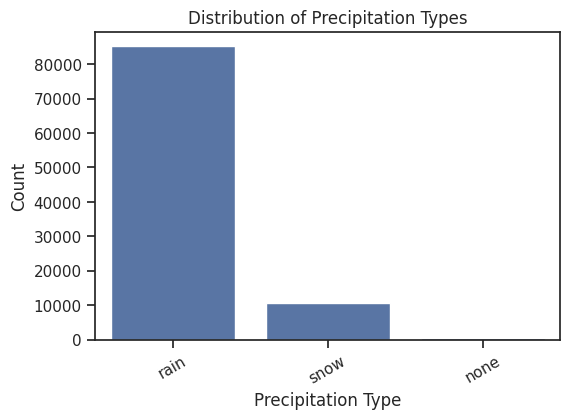

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Precip Type', data=df, order=df['Precip Type'].value_counts().index)
plt.title('Distribution of Precipitation Types')
plt.xlabel('Precipitation Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()


##Temperature vs. Apparent Temperature

Why: Show the relationship between actual and “feels like” temperature.

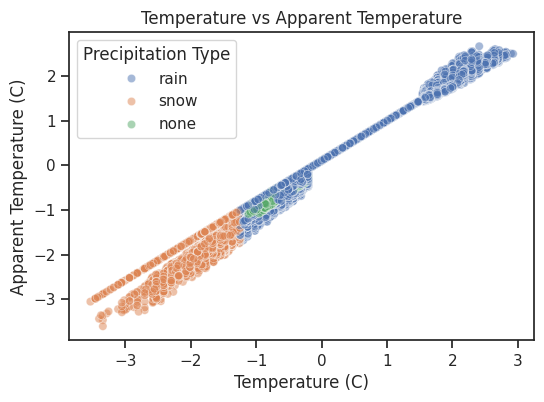

In [75]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Temperature (C)', y='Apparent Temperature (C)', hue='Precip Type', data=df, alpha=0.5)
plt.title('Temperature vs Apparent Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.legend(title='Precipitation Type')
plt.show()


##Distribution of Humidity

Why: See how humidity values are spread and if they differ by precipitation type.

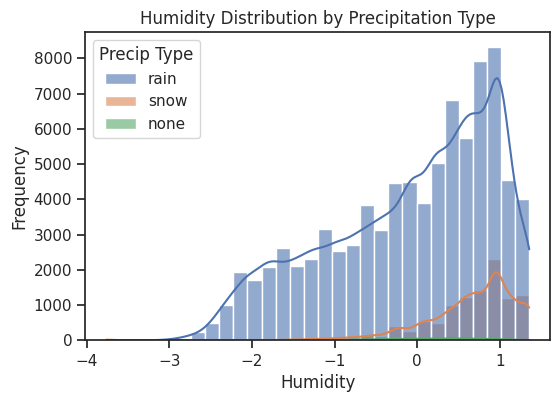

In [76]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Humidity', hue='Precip Type', bins=30, kde=True, alpha=0.6)
plt.title('Humidity Distribution by Precipitation Type')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()


## Correlation Heatmap of Numeric Features

Why: Identify which features are correlated (good for feature selection).

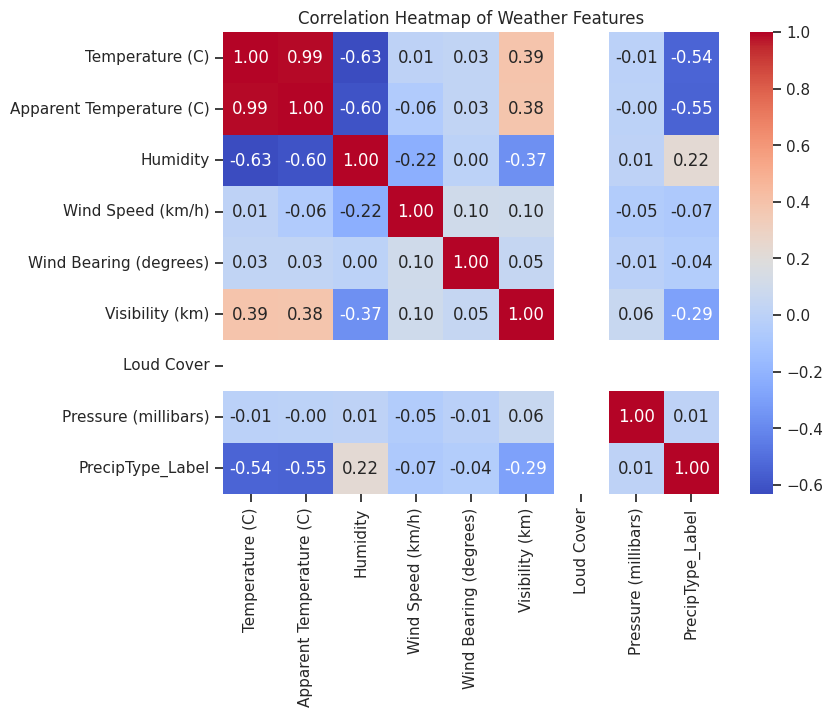

In [77]:
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Weather Features')
plt.show()


## Feature Importance from Random Forest Model

Why: Show which features the model thinks are most important for predicting precipitation type.

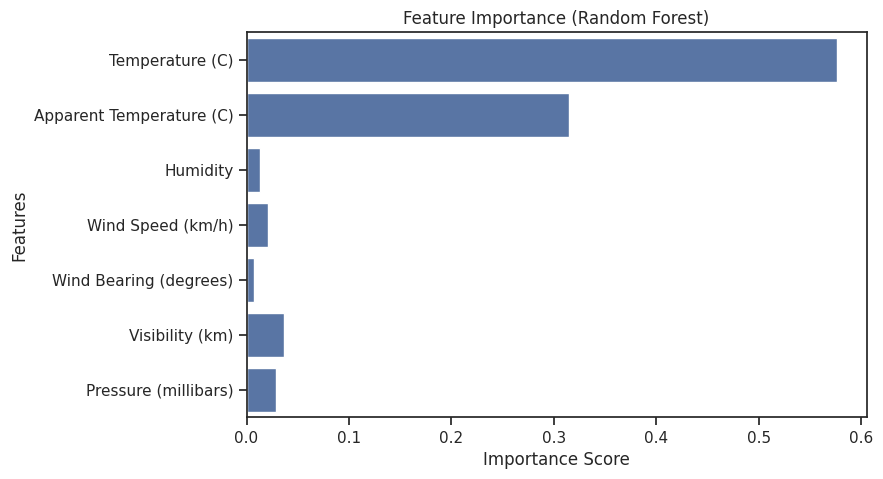

In [79]:
# Feature importance from your trained Random Forest
# Access the trained Random Forest model from the models dictionary
rf_model = models["Random Forest"]

importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Advanced Preprocessing: Feature Engineering

##Extract Date/Time Features

From Formatted Date you can create:

Year, Month, Day, Hour

Is Weekend flag



In [81]:
# Make sure Formatted Date is datetime
if 'Formatted Date' in df.columns:
    df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')

    # Extract features
    df['Year'] = df['Formatted Date'].dt.year
    df['Month'] = df['Formatted Date'].dt.month
    df['Day'] = df['Formatted Date'].dt.day
    df['Hour'] = df['Formatted Date'].dt.hour
    df['Day_of_Week'] = df['Formatted Date'].dt.dayofweek  # Monday=0
    df['Is_Weekend'] = df['Day_of_Week'].isin([5,6]).astype(int)


##Cyclical Encoding of Time Features

For features like Month or Hour, you can encode them cyclically (sine/cosine) so the model “knows” December is close to January and 23:00 is close to 0:00.

In [84]:
import numpy as np

# Example for Hour - ensure 'Hour' column exists
if 'Hour' in df.columns:
    df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
    df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
else:
    print("Error: 'Hour' column not found. Please run the cell to extract date/time features first.")


# Example for Month - ensure 'Month' column exists
if 'Month' in df.columns:
    df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
else:
    print("Error: 'Month' column not found. Please run the cell to extract date/time features first.")

Error: 'Hour' column not found. Please run the cell to extract date/time features first.
Error: 'Month' column not found. Please run the cell to extract date/time features first.


##Weather-Derived Features

Feels Like Difference: Apparent Temp minus Actual Temp

Wind Components: Split wind into X and Y components using bearing & speed

Humidity Category: Low/Medium/High humidity categories

In [85]:
# Feels Like Difference
df['FeelsLike_Diff'] = df['Apparent Temperature (C)'] - df['Temperature (C)']

# Wind Components
df['Wind_X'] = df['Wind Speed (km/h)'] * np.cos(np.radians(df['Wind Bearing (degrees)']))
df['Wind_Y'] = df['Wind Speed (km/h)'] * np.sin(np.radians(df['Wind Bearing (degrees)']))

# Humidity Categories
df['Humidity_Level'] = pd.cut(df['Humidity'], bins=[0,0.3,0.6,1], labels=['Low','Medium','High'])


## Display Engineered Features

In [89]:
# Show first few rows of the new engineered features
engineered_cols = [
    'Year', 'Month', 'Day', 'Hour', 'Day_of_Week', 'Is_Weekend',
    'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos',
    'FeelsLike_Diff', 'Wind_X', 'Wind_Y', 'Humidity_Level', 'Humidity_Level_Label'
]

# Filter only columns that actually exist in df (in case some were skipped)
engineered_cols = [c for c in engineered_cols if c in df.columns]

print("New Engineered Features (first 5 rows):")
print(df[engineered_cols].head())

# Check basic statistics of the engineered features
print("\nSummary statistics of engineered features:")
print(df[engineered_cols].describe())


New Engineered Features (first 5 rows):
                           FeelsLike_Diff    Wind_X    Wind_Y Humidity_Level
Formatted Date                                                              
2006-03-31 22:00:00+00:00       -0.066436  0.478610  0.004939           High
2006-03-31 23:00:00+00:00       -0.069284  0.499560  0.005805           High
2006-04-01 00:00:00+00:00        0.129385 -0.995470 -0.002668           High
2006-04-01 01:00:00+00:00       -0.077582  0.476264  0.006308         Medium
2006-04-01 02:00:00+00:00       -0.029838  0.033839  0.000393         Medium

Summary statistics of engineered features:
       FeelsLike_Diff        Wind_X        Wind_Y
count    9.645300e+04  96453.000000  96453.000000
mean    -4.095899e-17      0.000002      0.001812
std      1.214209e-01      0.999837      0.018236
min     -5.882077e-01     -1.562966     -0.136713
25%     -6.356671e-02     -0.720617     -0.005982
50%      1.149643e-02     -0.122185      0.000190
75%      7.717945e-02      

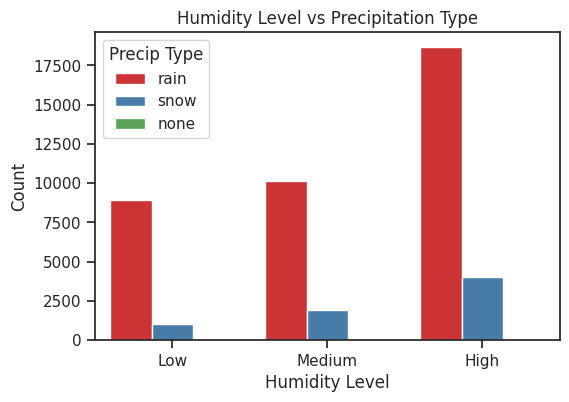

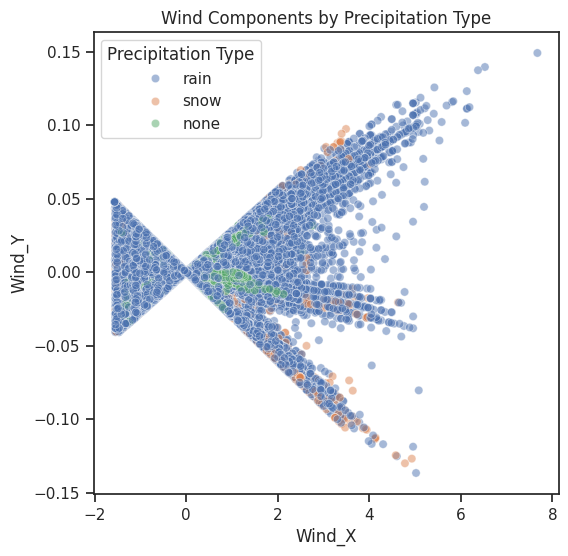

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index for plotting to avoid potential duplicate label issues
df_plot = df.reset_index()

# 1. Hour vs Precipitation Type
if 'Hour' in df_plot.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='Hour', hue='Precip Type', data=df_plot, palette='Set2')
    plt.title('Precipitation Type Distribution by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Count')
    plt.legend(title='Precipitation Type')
    plt.show()

# 2. Humidity Level Distribution
if 'Humidity_Level' in df_plot.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Humidity_Level', hue='Precip Type', data=df_plot, palette='Set1')
    plt.title('Humidity Level vs Precipitation Type')
    plt.xlabel('Humidity Level')
    plt.ylabel('Count')
    plt.show()

# 3. Wind Components Scatter Plot
if 'Wind_X' in df_plot.columns and 'Wind_Y' in df_plot.columns:
    plt.figure(figsize=(6,6))
    sns.scatterplot(x='Wind_X', y='Wind_Y', hue='Precip Type', data=df_plot, alpha=0.5)
    plt.title('Wind Components by Precipitation Type')
    plt.xlabel('Wind_X')
    plt.ylabel('Wind_Y')
    plt.legend(title='Precipitation Type')
    plt.show()

##Task 4 learning

n this step, we will train and compare three machine learning classifiers to predict the weather condition (precipitation type) from the historical weather data:

**1.Random Forest Classifier**

Builds many decision trees on random subsets of the data.

Combines their predictions (“majority vote”) for more stable and accurate results.

Handles numerical and categorical features well.

**2.Gradient Boosting Classifier**

Builds decision trees one by one.

Each new tree tries to correct the errors of the previous trees.

Works well for complex patterns but can be slower than Random Forest.

**3.XGBoost Classifier**

A highly optimized version of Gradient Boosting.

Faster training and better performance due to regularization, parallelization, and efficient tree building.

Very popular for competitions and real-world tasks.

**Process Outline**

Split the Data: We split the dataset into 80% training and 20% testing to evaluate how well each model performs on unseen data.

Define Features (X) and Target (y):

X (features): All weather variables (temperature, humidity, wind, pressure, visibility, etc.).

y (target): The encoded precipitation type (none, rain, snow).

Train the Models: Fit each classifier on the training data.

Make Predictions: Use the test data to predict precipitation type.

Evaluate Performance: Compare accuracy and classification reports to see which model performs best.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [69]:
# 1. Define X (features) and y (target)
X = df.drop(columns=['PrecipType_Label', 'Precip Type', 'Loud Cover'])  # all features except the target and irrelevant columns
y = df['PrecipType_Label']                # target column

In [70]:
# 2. Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (77162, 7)
Testing shape: (19291, 7)


In [71]:
# 3. Define the three models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [72]:
# 4. Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in set(y)]))



Training Random Forest...
Random Forest Accuracy: 0.9968
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57       103
           1       1.00      1.00      1.00     17045
           2       1.00      1.00      1.00      2143

    accuracy                           1.00     19291
   macro avg       1.00      0.80      0.86     19291
weighted avg       1.00      1.00      1.00     19291


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9960
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.33      0.47       103
           1       1.00      1.00      1.00     17045
           2       1.00      1.00      1.00      2143

    accuracy                           1.00     19291
   macro avg       0.94      0.78      0.82     19291
weighted avg       1.00      1.00      1.00     19291


Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:18:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9959
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.50      0.65       103
           1       1.00      1.00      1.00     17045
           2       0.99      1.00      0.99      2143

    accuracy                           1.00     19291
   macro avg       0.97      0.83      0.88     19291
weighted avg       1.00      1.00      1.00     19291



In [73]:
# 5. Show summary of all accuracies
print("\nSummary of Model Accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


Summary of Model Accuracies:
Random Forest: 0.9968
Gradient Boosting: 0.9960
XGBoost: 0.9959


##Task 5: Reflection

In this project we compared three powerful ensemble methods — Random Forest, Gradient Boosting, and XGBoost — for predicting weather conditions. Random Forest builds many independent decision trees and averages their outputs, which makes it stable and resistant to overfitting. Gradient Boosting builds trees sequentially, with each tree correcting the errors of the previous ones, which often leads to higher accuracy but requires more tuning and is slower. XGBoost is an optimized implementation of Gradient Boosting that adds regularization, parallel processing, and faster computation, making it highly efficient and competitive on large datasets. In our results, all three models achieved very high accuracy (around 99%), with Random Forest slightly ahead. For real-world weather prediction, I would recommend Random Forest as a starting point because it delivers high accuracy, is relatively simple to configure, handles many features well, and is less sensitive to hyperparameter tuning compared to Gradient Boosting or XGBoost.